In [5]:
install.packages('IRkernel')
IRkernel::installspec()

Installing package into 'C:/Users/quydu/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'IRkernel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\quydu\AppData\Local\Temp\RtmpMXpGE9\downloaded_packages


In [7]:
install.packages(c("tidyverse", "readr", "ggplot2", "scales"))

Installing packages into 'C:/Users/quydu/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'sys', 'ps', 'sass', 'cachem', 'rappdirs', 'rematch', 'askpass', 'prettyunits', 'processx', 'highr', 'xfun', 'yaml', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'bit', 'backports', 'generics', 'memoise', 'blob', 'DBI', 'tidyselect', 'data.table', 'gargle', 'cellranger', 'curl', 'ids', 'rematch2', 'pkgconfig', 'mime', 'openssl', 'timechange', 'systemfonts', 'textshaping', 'progress', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'stringi', 'bit64', 'broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'lubridate', 'magrittr', 'modelr', 'purrr', 'ragg', 'readxl', 'reprex', 'rstudioapi', 'rvest', 'stringr', 'tibble', 'tidyr', 'xml2', 'clipr', 'R6', 'vroom', 'cpp11', 'tzdb', 'gtable', 'isoband', 'withr', 'farver', 'labeling', 'RColorBrewer', 'viridisLite'




package 'sys' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'bslib' successfully unpacked and MD5 sums checked
package 'fontawesome' successfully unpacked and MD5 sums checked
package 'jquerylib' successfully unpacked and MD5 sums checked
package 'tinytex' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked

In [8]:
# load libraries

library(tidyverse)
library(readr)
library(ggplot2)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




# (1) Data Description:

This dataset provides a comprehensive look at Airbnb prices in Paris, Vienna, and Barcelona. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. Using spatial econometric methods, we analyse and identify the determinants of Airbnb prices across these cities. Our dataset includes information such as realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

## Source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data

# (2) Question: 

## How do listing characteristics and location-based factors influence Airbnb rental prices on weekdays versus weekends across Paris, Vienna, and Barcelona?

In this project, I aim to model and explain variations in the total rental price (realSum), which serves as the response variable, using at least the following explanatory variables:
- room_type: private/ shared/ entire home/ apt
- host_is_superhose: boolean alue indicating if host is a superhost or not
- multi: indicator whether listing is for multiple rooms or not
- biz: business indicator
- guest_satisfaction_overall: overall rating from guests from all listings offered by host
- bedrooms: number of bedrooms in the unit
- dist: distance from city center
- lng & lat coordinates for location identification

This dataset, which includes detailed Airbnb listing data from Barcelona, Paris, and Vienna, split by weekday and weekend, allows me to compare how different features impact pricing under varying travel demand patterns.

The main goal is to perform inference to identify and interpret which factors significantly influence price and whether these effects differ between weekdays and weekends. However, I will also assess prediction performance of the fitted regression models to validate the model's utility



# (3) EDA and Visualization

In [ ]:
# load the csv files for each city (weekday and weekend)

# IMPORTANT NOTE: Ensure the CSV files are in the "data" directory relative to your working directory
paris_weekday <- read_csv("data/paris_weekdays.csv")
paris_weekend <- read_csv("data/paris_weekends.csv")
vienna_weekday <- read_csv("data/vienna_weekdays.csv")
vienna_weekend <- read_csv("data/vienna_weekends.csv")
barcelona_weekday <- read_csv("data/barcelona_weekdays.csv")
barcelona_weekend <- read_csv("data/barcelona_weekends.csv")

head(paris_weekday)
head(paris_weekend)
head(vienna_weekday)
head(vienna_weekend)
head(barcelona_weekday)
head(barcelona_weekend)

New names:
• `` -> `...1`
Rows: 3130 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3558 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1738 Columns: 20
── Column specification ─────────────────

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,82,1,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,93,1,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,536.3967,Entire home/apt,FALSE,FALSE,5,FALSE,0,1,9,89,1,1.3512012,0.21234554,390.7768,19.00155,1030.7385,47.55037,2.35900,48.86800
1,290.1016,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998212,0.19371031,518.4783,25.21104,1218.6589,56.21958,2.35385,48.86282
2,445.7545,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,100,1,0.9689817,0.29434293,432.6899,21.03958,1069.8948,49.35674,2.36023,48.86375
3,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023186,0.23473971,444.5553,21.61653,902.8564,41.65087,2.31714,48.87475
4,266.3342,Entire home/apt,FALSE,FALSE,2,TRUE,0,0,9,88,1,1.4024298,0.05505193,1013.4587,49.27950,1348.0635,62.18931,2.33408,48.85384
5,345.0927,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475705,0.19600551,542.1394,26.36157,1199.1796,55.32095,2.35600,48.86100


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,250.5668,Entire home/apt,FALSE,FALSE,3,TRUE,1,0,10,99,1,1.732893,0.2126271,118.64683,8.496979,185.09672,4.424871,16.36500,48.22300
1,156.6043,Entire home/apt,FALSE,FALSE,3,FALSE,0,0,10,97,1,4.807912,0.2282531,80.14502,5.739643,85.72760,2.049380,16.33356,48.17459
2,283.0564,Entire home/apt,FALSE,FALSE,5,TRUE,0,1,10,95,2,2.811773,0.2441629,101.24811,7.250957,151.36429,3.618473,16.33600,48.21100
3,301.7554,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240595,0.6104299,92.47394,6.622588,129.86383,3.104489,16.33006,48.20921
4,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241146,1.1195067,124.25677,8.898738,154.34897,3.689824,16.38867,48.19104
5,162.4477,Private room,FALSE,TRUE,2,TRUE,1,0,10,99,1,4.611961,0.1999263,52.07794,3.729599,75.51554,1.805254,16.39755,48.24682


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,324.6617,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240613,0.6104498,92.47347,6.622340,129.86288,3.138736,16.33006,48.20921
1,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241126,1.1195048,124.25800,8.898538,154.35032,3.730588,16.38867,48.19104
2,196.3397,Entire home/apt,FALSE,FALSE,3,TRUE,0,1,9,91,1,2.371551,0.4524187,125.41313,8.981261,206.64249,4.994469,16.34236,48.20436
3,107.7531,Private room,FALSE,TRUE,2,FALSE,0,0,8,92,1,3.629114,0.4731637,62.45942,4.472931,93.81071,2.267369,16.37837,48.24102
4,196.3397,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,94,1,2.395063,0.4436346,124.02036,8.881520,202.31807,4.889950,16.34198,48.20456
5,212.2338,Entire home/apt,FALSE,FALSE,2,TRUE,1,0,10,97,1,2.011143,0.6790809,145.34915,10.408947,237.98831,5.752086,16.34682,48.20620


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,474.3175,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.111996,0.63049095,526.4694,17.94293,915.5871,20.15489,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.751839,0.12401717,320.1275,10.91046,794.2774,17.48449,2.14906,41.38714
2,161.9848,Private room,FALSE,TRUE,4,FALSE,0,1,9,88,1,1.670493,0.08032198,344.0739,11.72659,840.6736,18.50581,2.15357,41.37859
3,367.9568,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,10,91,1,1.475847,0.09310686,400.0574,13.63460,946.5899,20.83736,2.16839,41.37390
4,196.8953,Private room,FALSE,TRUE,3,FALSE,1,0,9,91,1,1.855452,0.27248605,346.0422,11.79368,792.2960,17.44087,2.15238,41.37699
5,330.9517,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,9,100,2,2.565611,0.70129045,391.0874,13.32889,525.5139,11.56818,2.18197,41.40842


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,532.0362,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.1119980,0.63050396,526.4715,20.32767,915.5915,20.11247,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.7518309,0.12401273,320.1283,12.36052,794.2797,17.44766,2.14906,41.38714
2,196.8953,Private room,FALSE,TRUE,2,FALSE,1,0,9,90,1,0.6217308,0.29751560,503.3540,19.43508,1242.4342,27.29211,2.16500,41.38300
3,141.2712,Private room,FALSE,TRUE,3,FALSE,0,1,9,86,1,1.6483109,0.08944189,342.5958,13.22802,820.9220,18.03290,2.15342,41.37912
4,715.2000,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,95,2,0.6935603,0.35765301,537.8031,20.76520,1081.5601,23.75824,2.17498,41.39214
5,173.3889,Private room,FALSE,TRUE,2,FALSE,0,0,9,96,1,1.4742189,0.59051076,448.4062,17.31348,752.7611,16.53563,2.18195,41.39691


In [10]:
# combine the data into one dataframe
combined_data <- bind_rows(
  paris_weekday %>% mutate(city = "Paris", day_type = "Weekday"),
  paris_weekend %>% mutate(city = "Paris", day_type = "Weekend"),
  vienna_weekday %>% mutate(city = "Vienna", day_type = "Weekday"),
  vienna_weekend %>% mutate(city = "Vienna", day_type = "Weekend"),
  barcelona_weekday %>% mutate(city = "Barcelona", day_type = "Weekday"),
  barcelona_weekend %>% mutate(city = "Barcelona", day_type = "Weekend")
)

head(combined_data)

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282,Paris,Weekday
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902,Paris,Weekday
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,⋯,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475,Paris,Weekday
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,⋯,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100,Paris,Weekday
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,⋯,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648,Paris,Weekday
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,⋯,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891,Paris,Weekday


In [12]:
# check if all the rows in each csv file are included
nrow(paris_weekday) + nrow(paris_weekend) + nrow(vienna_weekday) + 
  nrow(vienna_weekend) + nrow(barcelona_weekday) + nrow(barcelona_weekend) == nrow(combined_data)

[1] TRUE

In [13]:
# data summary
summary(combined_data)

      ...1         realSum          room_type         room_shared    
 Min.   :   0   Min.   :   63.58   Length:13058       Mode :logical  
 1st Qu.: 544   1st Qu.:  187.93   Class :character   FALSE:12936    
 Median :1088   Median :  260.74   Mode  :character   TRUE :122      
 Mean   :1254   Mean   :  330.21                                     
 3rd Qu.:1740   3rd Qu.:  380.29                                     
 Max.   :3557   Max.   :16445.61                                     
 room_private    person_capacity host_is_superhost     multi       
 Mode :logical   Min.   :2.000   Mode :logical     Min.   :0.0000  
 FALSE:8478      1st Qu.:2.000   FALSE:10598       1st Qu.:0.0000  
 TRUE :4580      Median :2.000   TRUE :2460        Median :0.0000  
                 Mean   :2.988                     Mean   :0.2716  
                 3rd Qu.:4.000                     3rd Qu.:1.0000  
                 Max.   :6.000                     Max.   :1.0000  
      biz         cleanliness_rati

In [15]:
# list numerical columns
numerical_columns <- sapply(combined_data, is.numeric)
numerical_columns

...1                    realSum 
                      TRUE                       TRUE 
                 room_type                room_shared 
                     FALSE                      FALSE 
              room_private            person_capacity 
                     FALSE                       TRUE 
         host_is_superhost                      multi 
                     FALSE                       TRUE 
                       biz         cleanliness_rating 
                      TRUE                       TRUE 
guest_satisfaction_overall                   bedrooms 
                      TRUE                       TRUE 
                      dist                 metro_dist 
                      TRUE                       TRUE 
                attr_index            attr_index_norm 
                      TRUE                       TRUE 
                rest_index            rest_index_norm 
                      TRUE                       TRUE 
                       lng                        lat 
                      TRUE                       TRUE 
                      city                   day_type 
                     FALSE                      FALSE

In [ ]:
# Clean the combined dataset
clean_data <- combined_data %>%
  # Drop unnecessary columns
  select(-1, -attr_index, -rest_index) %>%
  # Convert categorical variables to factors
  mutate(
    room_type = as.factor(room_type),
    host_is_superhost = as.factor(host_is_superhost),
    multi = as.factor(multi),
    biz = as.factor(biz),
    city = as.factor(city),
    day_type = as.factor(day_type)
  ) %>%
  # Remove outliers (e.g., prices beyond 3 standard deviations)
  filter(realSum <= mean(realSum) + 3*sd(realSum)) %>%
  # Create price per person column
  mutate(price_per_person = realSum/person_capacity) %>%
  # Scale numerical variables
  mutate(across(c(cleanliness_rating, guest_satisfaction_overall, 
                  dist, metro_dist), scale)) %>%
  # Remove any rows with missing values
  na.omit()

summary(clean_data)

    realSum                  room_type    room_shared     room_private   
 Min.   :  63.58   Entire home/apt:8288   Mode :logical   Mode :logical  
 1st Qu.: 187.35   Private room   :4574   FALSE:12862     FALSE:8410     
 Median : 259.75   Shared room    : 122   TRUE :122       TRUE :4574     
 Mean   : 314.43                                                         
 3rd Qu.: 376.55                                                         
 Max.   :1412.99                                                         
 person_capacity host_is_superhost multi    biz        cleanliness_rating.V1  
 Min.   :2.000   FALSE:10535       0:9455   0:9245   Min.   :-7.645253632020  
 1st Qu.:2.000   TRUE : 2449       1:3529   1:3739   1st Qu.:-0.338994107210  
 Median :2.000                                       Median : 0.704757253477  
 Mean   :2.977                                       Mean   : 0.000000000000  
 3rd Qu.:4.000                                       3rd Qu.: 0.704757253477  
 Max.   

In [17]:
head(clean_data)

realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,city,day_type,price_per_person
<dbl>,<fct>,<lgl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>",<dbl>,"<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,0.7047573,0.55998910,1,-1.3079086,-0.4746347,25.23938,71.60803,2.35385,48.86282,Paris,Weekday,148.07997
288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,0.7047573,0.55998910,1,-0.4527684,-0.7287699,42.50791,58.79146,2.32436,48.85902,Paris,Weekday,144.11874
211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,0.7047573,0.20383439,1,0.2815289,-0.3541195,21.64084,53.05131,2.31714,48.87475,Paris,Weekday,105.67154
298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,-0.3389941,-0.15232033,1,-1.4008953,-0.4679143,26.39129,70.46351,2.35600,48.86100,Paris,Weekday,149.47805
247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,-2.4264968,-1.22078447,1,-1.0037019,-0.7394885,19.80916,62.91827,2.35915,48.86648,Paris,Weekday,61.98155
527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,0.7047573,0.08511615,1,-0.7928274,0.5697205,47.09651,64.39284,2.33201,48.85891,Paris,Weekday,131.76904


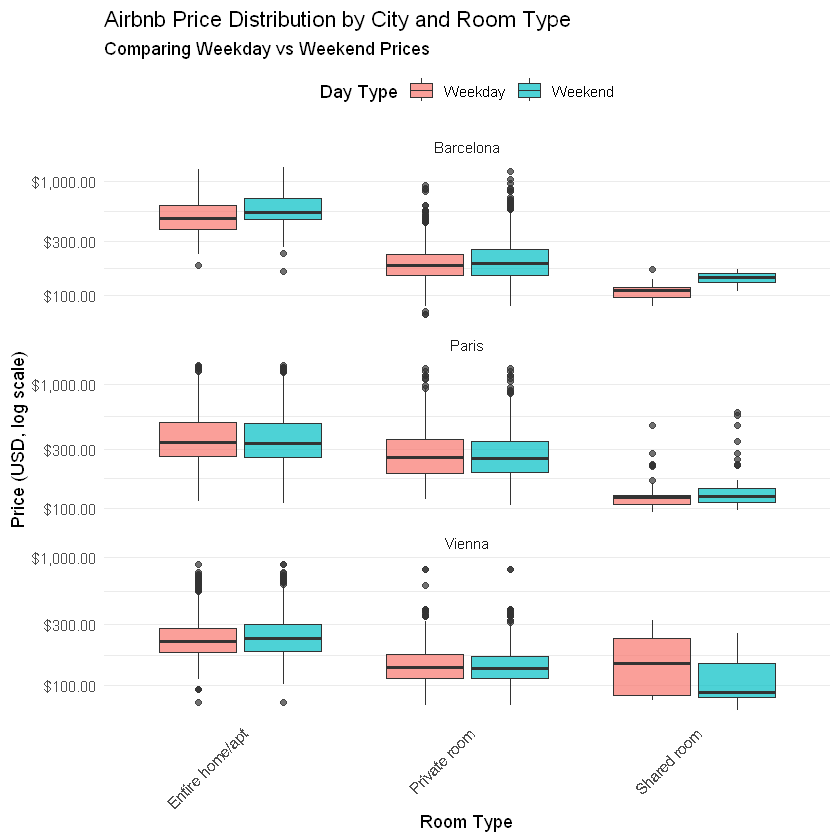

In [ ]:
# Price Distribution by City and Room Type with log scale

ggplot(clean_data, aes(x = room_type, y = realSum, fill = day_type)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~city, scales = "free_y", ncol = 1) +
  scale_y_log10(labels = scales::dollar_format()) +
  labs(
    title = "Airbnb Price Distribution by City and Room Type",
    subtitle = "Comparing Weekday vs Weekend Prices",
    x = "Room Type",
    y = "Price (USD, log scale)",
    fill = "Day Type"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top",
    panel.grid.major.x = element_blank()  
  )

### Price Distribution Analysis

The boxplot visualization reveals clear pricing hierarchies and patterns across the three cities. Entire homes/apartments consistently command the highest median prices in all cities, with Paris leading the price range, followed by Barcelona, while Vienna offers more affordable options. The spread of prices for entire homes is notably wider, suggesting greater price flexibility in this category.

Private rooms occupy the middle price tier, with remarkably consistent pricing between $100-300 across all three cities. The narrower price ranges for private rooms indicate more standardized pricing in this category, likely due to stronger market competition. Interestingly, the weekend premium for private rooms remains minimal across all cities.

Shared rooms emerge as the most affordable option with the most concentrated price distribution. Barcelona shows a notable weekend premium for shared rooms, while Paris displays an interesting pattern of multiple price tiers in this category. Vienna maintains the most stable pricing between weekdays and weekends across all room types.

The log scale effectively highlights these price variations while revealing that price variability is highest for entire homes in Paris, moderate for private rooms across all cities, and most concentrated for shared rooms. These patterns suggest different market dynamics and pricing strategies across cities and room types, with Paris commanding premium prices, Barcelona showing moderate levels, and Vienna positioning itself as the most affordable

# (4) Methods and Plan

## Proposed Method: Multiple Linear Regression with Interaction Terms

Given our research question about how various listing characteristics and location-based factors influence Airbnb prices across different cities and time periods, I propose using multiple linear regression with interaction terms. The model will use log-transformed price (realSum) as the response variable, given the right-skewed distribution revealed in our EDA.

The base model structure will be:


In [26]:
log(realSum) ~ room_type + host_is_superhost + multi + biz + 
                guest_satisfaction_overall + bedrooms + dist + 
                city + day_type + 
                city:day_type + room_type:day_type

log(realSum) ~ room_type + host_is_superhost + multi + biz + 
    guest_satisfaction_overall + bedrooms + dist + city + day_type + 
    city:day_type + room_type:day_type



## Method Appropriateness

This method aligns well with our research goals because:
1. The log transformation of prices addresses the observed right-skewed distribution
2. Interaction terms (city:day_type, room_type:day_type) allow us to examine how pricing patterns differ between weekdays and weekends across cities and room types
3. Multiple regression can quantify the relative importance of different factors while controlling for others
4. The method provides interpretable coefficients for both categorical and continuous variables

## Required Assumptions

The method requires several key assumptions:
1. Linearity: After log transformation, relationships between predictors and price should be approximately linear
2. Independence: Observations should be independent (may be violated if same properties listed multiple times)
3. Homoscedasticity: Variance of residuals should be constant
4. Normality: Residuals should be approximately normally distributed
5. No multicollinearity: Predictors should not be highly correlated

## Potential Limitations

The proposed method has several limitations:
1. Spatial autocorrelation is not directly addressed - nearby properties may have correlated prices
2. The model assumes additive effects (even with interactions), which may miss complex non-linear relationships
3. Time-based patterns beyond weekday/weekend differences are not captured
4. The log transformation, while helpful for the price distribution, may complicate interpretation
5. The model cannot capture potential seasonal variations or long-term trends in pricing

These limitations could be addressed in future analyses through techniques like spatial regression or time series methods, but the proposed approach provides a solid foundation for understanding the main pricing determinants while maintaining interpretability.